<a href="https://colab.research.google.com/github/applejxd/colaboratory/blob/master/algorithm/linalg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 特異値分解

In [379]:
%reset -f

### 右特異ベクトル

行列 $A$ に対して行列 $A^TA$ を考える。
明らかに $(A^TA)^T=A^TA$ なので対称行列。
[スペクトル定理](https://ja.wikipedia.org/wiki/%E3%82%B9%E3%83%9A%E3%82%AF%E3%83%88%E3%83%AB%E5%AE%9A%E7%90%86)より固有値は常に実数である。

また行列 $A$ の非負定値の条件は任意の $\vec{x}\neq\vec{0}$ に対して $\vec{x}^TA\vec{x}\geq0$。
よって任意の $A, \vec{x}\neq\vec{0}$ に対して $\vec{x}^T(A^TA)\vec{x}=||A\vec{x}||^2\geq0$。
これより固有値は常に非負である。そのため固有値の平方根も常に実数である。

これは $AA^T$ でも同様に成立。

実際に確かめるために乱数生成の行列でこれを計算。

<Axes: >

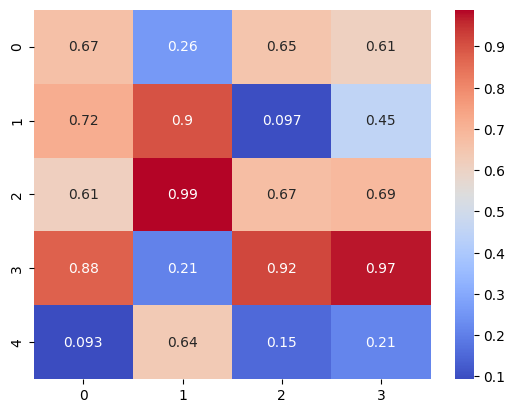

In [380]:
import numpy as np
import seaborn as sns

# 表示の精度を設定
np.set_printoptions(precision=3, suppress=False)

N, M = 5, 4
A = np.random.rand(N, M)
sns.heatmap(A, annot=True, cmap='coolwarm')

<Axes: >

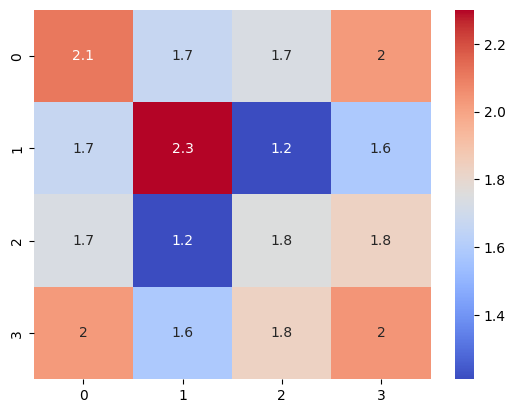

In [381]:
ATA = A.T @ A
sns.heatmap(ATA, annot=True, cmap='coolwarm')

固有値はすべて実数。

w_right=array([7.101e+00, 9.558e-01, 1.387e-01, 6.945e-03])


<Axes: >

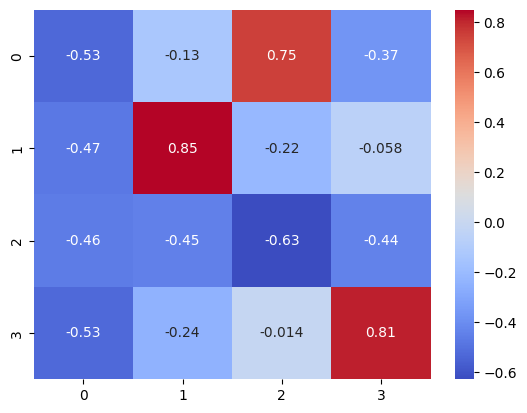

In [382]:
import numpy.linalg as la

w_right, V = la.eigh(ATA)
# 固有値が大きい順
w_right, V = w_right[::-1], V[:, ::-1]
print(f"{w_right=}")
sns.heatmap(V, annot=True, cmap='coolwarm')

固有ベクトルは v の各列が対応。
検算で $\vec{v}^T(A^TA)\vec{v}-w$ を計算。

In [383]:
residuals = np.array([
    V[:, idx].T @ ATA @ V[:, idx] - w_right[idx]
    for idx in range(len(w_right))])
print(f"{residuals=}")

residuals=array([-3.553e-15, -4.441e-16, -2.776e-16, -3.036e-16])


$V$ 行列は直交行列(ユニタリー行列)で右特異ベクトル

<Axes: >

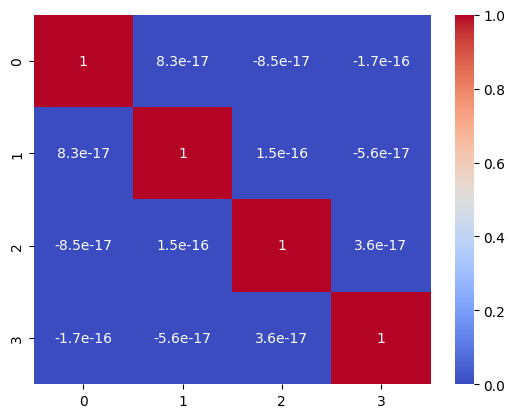

In [384]:
import seaborn as sns

# 検算。ユニタリなら単位行列に近くなる。
sns.heatmap(V.T @ V, annot=True, cmap='coolwarm')

### 左特異ベクトル

同様に $AA^T$ について計算し右特異ベクトル$U$を求める

w_left=array([7.101e+00, 9.558e-01, 1.387e-01, 6.945e-03, 2.918e-16])


<Axes: >

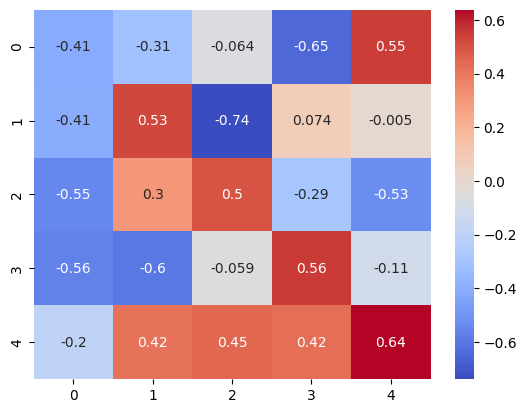

In [385]:
AAT = A @ A.T
w_left, U = la.eigh(AAT)
# 固有値が大きい順
w_left, U = w_left[::-1], U[:, ::-1]

print(f"{w_left=}")
sns.heatmap(U, annot=True, cmap='coolwarm')

右特異ベクトルを検算

<Axes: >

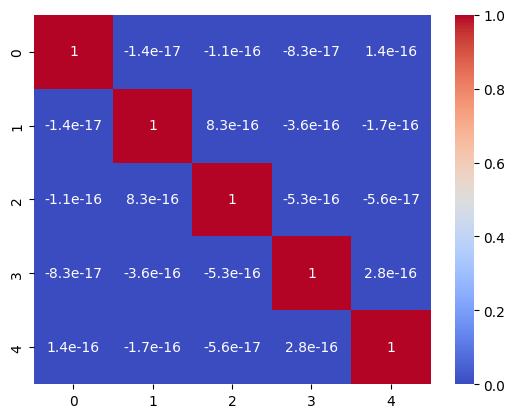

In [386]:
sns.heatmap(U.T @ U, annot=True, cmap='coolwarm')

### 特異値分解

数値誤差の対策。ほぼ0は0とする。

In [387]:
w_right = np.array([w if abs(w) > 1e-10 else 0 for w in w_right])
w_left = np.array([w if abs(w) > 1e-10 else 0 for w in w_left])
print(f"{w_right=}")
print(f"{w_left=}")

w_right=array([7.101e+00, 9.558e-01, 1.387e-01, 6.945e-03])
w_left=array([7.101e+00, 9.558e-01, 1.387e-01, 6.945e-03, 0.000e+00])


$A^TA, AA^T$ の固有値の平方根は特異値

In [388]:
sigma_right = np.sqrt(w_right)
sigma_left = np.sqrt(w_left)
print(f"{sigma_right=}")
print(f"{sigma_left=}")

sigma_right=array([2.665, 0.978, 0.372, 0.083])
sigma_left=array([2.665, 0.978, 0.372, 0.083, 0.   ])


特異値による行列 $\Sigma$ を作成

In [389]:
Sigma = np.zeros_like(A)
sigma = sigma_right if len(sigma_right) < len(sigma_left) else sigma_left
Sigma[:len(sigma), :len(sigma)] = np.diag(sigma)
print(f"{Sigma=}")

Sigma=array([[2.665, 0.   , 0.   , 0.   ],
       [0.   , 0.978, 0.   , 0.   ],
       [0.   , 0.   , 0.372, 0.   ],
       [0.   , 0.   , 0.   , 0.083],
       [0.   , 0.   , 0.   , 0.   ]])


特異値分解 $A=U\Sigma V^T$ の検算。

<Axes: >

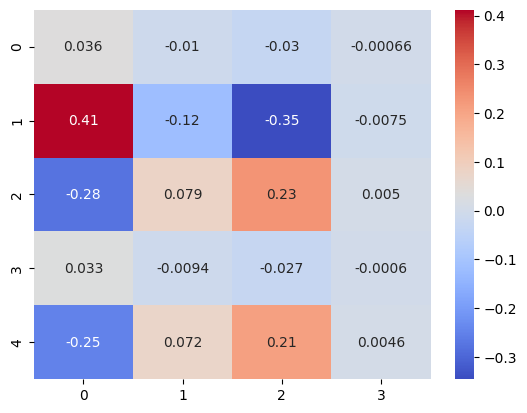

In [390]:
residuals = A - (U @ Sigma @ V.T)
sns.heatmap(residuals, annot=True, cmap='coolwarm')